# Titanic Data Prediction Model

**DATE**:- 12-05-2024  
**Model Name**:- Titanic Data Prediction Model  
**Dataset**:- https://www.kaggle.com/competitions/titanic/data  
**Author**:- Supriyo Chowdhury  
**License**:- MIT  
**Language**:- Python 3.11.5  

This is a model defined to predict from the Titanic Disaster Dataset for the competetion Titanic- Machine Learning from Disaster Dataset

In this Kernel we will be looking into Decision Tree Algorithm and will use it for making the predictions on the Dataset.

This is not the accurate model for this dataset, but here we will see how to make use of Decision Tress.

*This is my first Kernel so feel free to drop comments and suggestions.*

## Decision Trees:-
Decision Trees are simpler algorithms for classification. While we are creating any ML Model for predictions its better to go with simpler models initially.

Decision Tree is very useful, for classification and understanding initial ML Models.

Decision Tree has few limitations, like its tendency to overfit and its inability to understand the relationship between variables.

Here we will see,
How to understand the data,
How to find the Attribute using ASM (Attribute Selection Measures)
How to find the nearest optimal solution using trees
and How to visualize that tree.

## Understanding Titanic Dataset

In the dataset given in Kaggle there are three files
1. train.csv [Gives the training data]
2. test.csv [Gives the testing data]
3. gender_submission.csv  [Gives the data which shows example of gender submission that how the output file will look]

## Dataset:-

Now we will process the dataset through python and try to get insights of the dataset

In [2]:
!pip install scikit-learn

In [84]:
#Importing Modules

#Basic modules
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Plotly modules
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

#Display Module
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as PImage
from subprocess import check_call

#sklearn Modules
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score


### Opening the files for the data
Here we will open the csv files and get the data and convert then in dataframes

In [85]:
#Opening the files
train_data = pd.read_csv("Datasets/Titanic/train.csv")
test_data = pd.read_csv("Datasets/Titanic/test.csv")

# Store our test passenger IDs for easy access
PassengerId = test_data['PassengerId']

#Showing overview of training set
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here we can see there are 12 columns and the column "Survived" is already in binary format. Also we can see there are some Categorical Data and Numerical Data. So now we will try to play with these datas to make it relevant for ML Model
Now we will see what we can do with the data

In [86]:
#Copy the dataset so that if we need it for furture use
#Instead of entirely copying make a reference to the data
#copy() function creates a reference to the original dataframe
org_train_data = train_data.copy()


## Preview the dataset and Understand it

In [87]:
## Previewing the train data

org_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
## Previewing the test data

test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


On viewing we can see that here "Survived" is the dependent variable and the other 11 columns are independent variable

### Summary of Dataset
Here we will she how the test and train data look like seperately

In [89]:
#Summary of Train Data
org_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
#Summary of Test Data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## Feature Engineering

As we can see there are many features which are not directly impacting the outcome, we need to do some twist and turn so that we can get the best features.


In [91]:
#We will first create a dataframe with both test and train data

comp_data=[train_data,test_data]

comp_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [92]:
#I will check both the coliumns of train and test data
print(train_data.columns.to_list())


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [93]:
#I will check both the coliumns of test data
print(test_data.columns.to_list())

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


### Dividing the Data into Categorical Data

Lets get the categorical data

In [94]:
#getting the categorical data
categorical_data = [var for var in train_data.columns if train_data[var].dtype=='O']

print("These are categorical datas, ", categorical_data)

These are categorical datas,  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [95]:
## Lets see the categorical data
train_data[categorical_data].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


Here we are looking that Cabin Number won't make much sense in training the data. But deleting this filed also will affect the accuracy of the model.
What is more necessary here is whether the person had a cabin or not. So we can add a feature as "Has_Cabin", with boolean values, where 1 represents has cabin and 0 represent does not have cabin.

#### Feature Engineering on "Cabin" Feature

In [96]:
# Feature that tells whether a passenger had a cabin on the Titanic
train_data['Has_Cabin'] = train_data["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test_data['Has_Cabin'] = test_data["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [97]:
train_data.head()
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


Now we can see Cabin doesn't have any relevant information, so we can drop "Cabin" Feature.

In [98]:
train_data = train_data.drop('Cabin',axis= 1)
test_data = test_data.drop('Cabin', axis =1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


Now lets check some missing values in these variables train_data and test_data

#### Feature Engineering on "Embarked" Feature

In [99]:
#getting the categorical data after deletion
categorical_data = [var for var in train_data.columns if train_data[var].dtype=='O']

print("These are categorical datas, ", categorical_data)

These are categorical datas,  ['Name', 'Sex', 'Ticket', 'Embarked']


In [100]:
train_data[categorical_data].isnull().sum()

Name        0
Sex         0
Ticket      0
Embarked    2
dtype: int64

In [101]:
test_data[categorical_data].isnull().sum()

Name        0
Sex         0
Ticket      0
Embarked    0
dtype: int64

As you can see there are 2 NAN values, so we will delete these values and replace them with 'S'

In [102]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')
test_data['Embarked'] = test_data['Embarked'].fillna('S')

In [103]:
train_data[categorical_data].isnull().sum()

Name        0
Sex         0
Ticket      0
Embarked    0
dtype: int64

Now we can check the cardinality of the feature Embarked and can map with respective numerical values

In [104]:
#To check the different type of variables and its value counts
train_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [105]:
#To check the different type of variables and its value counts
test_data['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

Here we can see there are only three values , hence we can map them easily as "S":"0", "C":"1" and "Q":"2"

In [106]:
# Mapping Embarked
train_data['Embarked'] = train_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_data['Embarked'] = test_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,0


#### Feature Engineering on "Sex" Feature

In [107]:
#getting the categorical data after updation
categorical_data = [var for var in train_data.columns if train_data[var].dtype=='O']

print("These are categorical datas, ", categorical_data)

These are categorical datas,  ['Name', 'Sex', 'Ticket']


Out of 5 categorical data we have handled 2, lets work on the rest 3. 
Now we will work on the "Sex" feature.

Lets see whats the cardinality for the feature "Sex".

In [108]:
#To check the different type of variables and its value counts
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [109]:
test_data['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

Here we can see there are only two values, hence lets map them as "male":"1" and "female":"0"


In [110]:
train_data['Sex']=train_data['Sex'].map({'male':'1','female':'0'}).astype(int)
test_data['Sex']=test_data['Sex'].map({'male':'1','female':'0'}).astype(int)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0


#### Feature Engineering on "Ticket" Feature

In [111]:
#getting the categorical data after updation
categorical_data = [var for var in train_data.columns if train_data[var].dtype=='O']

print("These are categorical datas, ", categorical_data)

These are categorical datas,  ['Name', 'Ticket']


As Ticket field is not contirbuting to the outcome of the model, hence we can drop it without any fear.

In [112]:
train_data = train_data.drop('Ticket',axis = 1)
test_data = test_data.drop('Ticket',axis = 1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,0


#### Feature Engineering on "Name" Feature

Here we can see that Name directly doesn't contirbute to the outcome. We need to see the lables of the "Name" field

In [113]:
train_data['Name'].value_counts()

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

Here instead of names we can consider the titles and map then in numerical form

In [114]:
#Defining a function to extract titles from passenger names
def get_title(name):
    title =  re.search(' ([A-Za-z]+)\.',name)
    if title:
        return title.group()
    return ""

Now we will create a new field called Title, where we are extracting from the names

In [115]:
train_data["Title"]=train_data["Name"].apply(get_title)
test_data["Title"]=test_data["Name"].apply(get_title)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,0,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,1,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0,1,Mrs.
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,0,Mr.


Now lets again the value counts of Title

In [116]:
train_data['Title'].value_counts()

Title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64

In [117]:
test_data['Title'].value_counts()

Title
Mr.        240
Miss.       78
Mrs.        72
Master.     21
Col.         2
Rev.         2
Ms.          1
Dr.          1
Dona.        1
Name: count, dtype: int64

We can see that Mlle, Ms and Mme are german representation of "Miss", "Miss" and "Mrs". Hence we will replace them with the respective values. And also will delete the "." and extra space

In [118]:
#Deleting "." and extra spaces
train_data["Title"] = train_data["Title"].str.replace(".","").str.strip()
test_data["Title"] = test_data["Title"].str.replace(".","").str.strip()
train_data['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [119]:
#Replacing the german titles with english titles
train_data['Title'] = train_data['Title'].replace("Mlle","Miss")
test_data['Title'] = test_data['Title'].replace("Mlle","Miss")

train_data['Title'] = train_data['Title'].replace("Ms","Miss")
test_data['Title'] = test_data['Title'].replace("Ms","Miss")

train_data['Title'] = train_data['Title'].replace("Mme","Mrs")
test_data['Title'] = test_data['Title'].replace("Mme","Mrs")

train_data['Title'].value_counts()

Title
Mr          517
Miss        185
Mrs         126
Master       40
Dr            7
Rev           6
Major         2
Col           2
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

Also we can see there are soo many values as Dr, Rev etc.. We can label them as "Rare" titles and can map them

In [120]:
train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_data['Title'] = test_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

In [121]:
test_data['Title'].value_counts()

Title
Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: count, dtype: int64

Here we can see there are only 5 values now we can map them as "Mr":"1", "Miss" : "2", "Mrs" : "3", "Master" : "4", "Rare" : "5".

In [122]:
train_data['Title']=train_data['Title'].map({"Mr" : "1", "Miss" : "2", "Mrs" : "3", "Master" : "4", "Rare" : "5"}).astype(int)
test_data['Title']=test_data['Title'].map({"Mr" : "1", "Miss" : "2", "Mrs" : "3", "Master" : "4", "Rare" : "5"}).astype(int)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,1,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0,1,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,0,1


In [123]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,2,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,0,0,3
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,2,0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,0,0,3


Now as we have mapped now we can drop the "Name" column

In [124]:
train_data=train_data.drop('Name',axis=1)
test_data=test_data.drop('Name',axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,1,3
2,3,1,3,0,26.0,0,0,7.9250,0,0,2
3,4,1,1,0,35.0,1,0,53.1000,0,1,3
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


In [125]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title
0,892,3,1,34.5,0,0,7.8292,2,0,1
1,893,3,0,47.0,1,0,7.0000,0,0,3
2,894,2,1,62.0,0,0,9.6875,2,0,1
3,895,3,1,27.0,0,0,8.6625,0,0,1
4,896,3,0,22.0,1,1,12.2875,0,0,3


### Feature Engineering on Numerical Data

Now we will work one by one on the numerical data. Lets first get the columsn with numerical data.

In [126]:
numerical_data = [var for var in train_data.columns if train_data[var].dtype != 'O']

print("Here the columns with Numerical data is, ", numerical_data)

Here the columns with Numerical data is,  ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Has_Cabin', 'Title']


As we have already handled Embarked, Has_Cabin, Sex and Title, hence we will not work on them.
First we will see the status on the Nan values, how Nan values are distributed. Hence we can drop them from numerical data list.

In [127]:
numerical_data.remove('Sex')
numerical_data.remove('Embarked')
numerical_data.remove('Has_Cabin')
numerical_data.remove('Title')
print(numerical_data)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [128]:
#Looking at Nan values for Train Data
train_data[numerical_data].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

#### Feature Engineering on "Survived" Feature

Lets showw how survived value is labelled

In [129]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

As we can see there are only two values and are rightly mapped, hence we don't need to do any engineering on it. Also we can drop this from the numerical data list

In [130]:
numerical_data.remove('Survived')
print(numerical_data)

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [131]:
#Looking at Nan values for Test Data
test_data[numerical_data].isnull().sum()

PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
dtype: int64

#### Feature Engineering on "Age" Feature

We can see Age has the maximum number of Nan Values. Hence we will remove all nulls in the Age column.
To do this:-
1. We will first calculate the mean of the Age Column
2. We will calculate SD of the Age column
3. Now we will get random age between the range mean_age-SD_age and mean_age+SD_age

Lets do this in code

In [132]:
#Doing first for train Data
age_avg = train_data['Age'].mean() #mean
age_std = train_data['Age'].std() #Standard Deviation

#Get the null count and its size
age_null_count = train_data['Age'].isnull().sum()

#Calculating the randoms and storing it in list
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

# Next line has been improved to avoid warning
train_data.loc[np.isnan(train_data['Age']), 'Age'] = age_null_random_list
train_data['Age'] = train_data['Age'].astype(int)

train_data['Age'].value_counts()

Age
24    36
22    35
30    35
19    33
21    31
      ..
12     1
53     1
80     1
66     1
74     1
Name: count, Length: 71, dtype: int64

In [133]:
#Looking at Nan values for Train Data
train_data[numerical_data].isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [134]:
#Doing first for test Data
age_avg = test_data['Age'].mean() #mean
age_std = test_data['Age'].std() #Standard Deviation

#Get the null count and its size
age_null_count = test_data['Age'].isnull().sum()

#Calculating the randoms and storing it in list
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

# Next line has been improved to avoid warning
test_data.loc[np.isnan(test_data['Age']), 'Age'] = age_null_random_list
test_data['Age'] = test_data['Age'].astype(int)

test_data['Age'].value_counts()

Age
24    21
21    20
22    20
30    20
18    18
      ..
59     1
44     1
5      1
51     1
3      1
Name: count, Length: 64, dtype: int64

In [135]:
#Looking at Nan values for Test Data
test_data[numerical_data].isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
dtype: int64

Now as we have removed the Nan Values, lets map them in range.
1. If Age <= 16, then map its as 0
2. If Age>16 and Age<=32 map it as 1
3. If Age>32 and Age<=48 map it as 2
4. If Age>48 and Age<=64 map it as 3
5. If Age>64 map it as 4

In [136]:
# Mapping Age for train _data
train_data.loc[ train_data['Age'] <= 16, 'Age'] = 0
train_data.loc[(train_data['Age'] > 16) & (train_data['Age'] <= 32), 'Age'] = 1
train_data.loc[(train_data['Age'] > 32) & (train_data['Age'] <= 48), 'Age'] = 2
train_data.loc[(train_data['Age'] > 48) & (train_data['Age'] <= 64), 'Age'] = 3
train_data.loc[ train_data['Age'] > 64, 'Age'] = 4

train_data['Age'] = train_data['Age'].astype(int)

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title
0,1,0,3,1,1,1,0,7.2500,0,0,1
1,2,1,1,0,2,1,0,71.2833,1,1,3
2,3,1,3,0,1,0,0,7.9250,0,0,2
3,4,1,1,0,2,1,0,53.1000,0,1,3
4,5,0,3,1,2,0,0,8.0500,0,0,1


In [137]:
# Mapping Age for test _data
test_data.loc[ test_data['Age'] <= 16, 'Age'] = 0
test_data.loc[(test_data['Age'] > 16) & (test_data['Age'] <= 32), 'Age'] = 1
test_data.loc[(test_data['Age'] > 32) & (test_data['Age'] <= 48), 'Age'] = 2
test_data.loc[(test_data['Age'] > 48) & (test_data['Age'] <= 64), 'Age'] = 3
test_data.loc[ test_data['Age'] > 64, 'Age'] = 4

test_data['Age'] = test_data['Age'].astype(int)

test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title
0,892,3,1,2,0,0,7.8292,2,0,1
1,893,3,0,2,1,0,7.0000,0,0,3
2,894,2,1,3,0,0,9.6875,2,0,1
3,895,3,1,1,0,0,8.6625,0,0,1
4,896,3,0,1,1,1,12.2875,0,0,3


In [138]:
numerical_data.remove('Age')
print(numerical_data)

['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare']


#### Feature Engineering on "Fare" Feature

In [139]:
train_data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

We can see the fare value is in float type, and it has drastic variables. Hence we can set a mapping for these ranges.
Here the lowest value is 7.91 and the highest value is 512.329200.
Here we are dividing in three equal ranges.

1. Fare<=7.91 --> 0
2. Fare>7.91 and Fare<=14.454 ---> 1
3. Fare>14.454 and Fare<=31.00000 ----> 2
4. Fare<31.000000---> 3

In [140]:
# Mapping Fare for train data
train_data.loc[ train_data['Fare'] <= 7.91, 'Fare'] = 0
train_data.loc[(train_data['Fare'] > 7.91) & (train_data['Fare'] <= 14.454), 'Fare'] = 1
train_data.loc[(train_data['Fare'] > 14.454) & (train_data['Fare'] <= 31), 'Fare']   = 2
train_data.loc[ train_data['Fare'] > 31, 'Fare'] = 3
train_data['Fare'] = train_data['Fare'].astype(int)

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title
0,1,0,3,1,1,1,0,0,0,0,1
1,2,1,1,0,2,1,0,3,1,1,3
2,3,1,3,0,1,0,0,1,0,0,2
3,4,1,1,0,2,1,0,3,0,1,3
4,5,0,3,1,2,0,0,1,0,0,1


In [141]:
# Remove all NULLS in the Fare column
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

# Mapping Fare for test data
test_data.loc[ test_data['Fare'] <= 7.91, 'Fare'] = 0
test_data.loc[(test_data['Fare'] > 7.91) & (test_data['Fare'] <= 14.454), 'Fare'] = 1
test_data.loc[(test_data['Fare'] > 14.454) & (test_data['Fare'] <= 31), 'Fare']   = 2
test_data.loc[ test_data['Fare'] > 31, 'Fare'] = 3
test_data['Fare'] = test_data['Fare'].astype(int)

test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title
0,892,3,1,2,0,0,0,2,0,1
1,893,3,0,2,1,0,0,0,0,3
2,894,2,1,3,0,0,1,2,0,1
3,895,3,1,1,0,0,1,0,0,1
4,896,3,0,1,1,1,1,0,0,3


In [142]:
numerical_data.remove('Fare')
print(numerical_data)

['PassengerId', 'Pclass', 'SibSp', 'Parch']


#### Feature Engineering on "SibSp" and "Parch" Feature

As these features doesn't contirbute directly to the outcome, but we can create Family Size features using these two features.

In [143]:
# Create new feature FamilySize as a combination of SibSp and Parch
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title,FamilySize
0,1,0,3,1,1,1,0,0,0,0,1,2
1,2,1,1,0,2,1,0,3,1,1,3,2
2,3,1,3,0,1,0,0,1,0,0,2,1
3,4,1,1,0,2,1,0,3,0,1,3,2
4,5,0,3,1,2,0,0,1,0,0,1,1


In [144]:
# Create new feature IsAlone from FamilySize
train_data['IsAlone'] = 0
train_data.loc[train_data['FamilySize'] == 1, 'IsAlone'] = 1

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title,FamilySize,IsAlone
0,1,0,3,1,1,1,0,0,0,0,1,2,0
1,2,1,1,0,2,1,0,3,1,1,3,2,0
2,3,1,3,0,1,0,0,1,0,0,2,1,1
3,4,1,1,0,2,1,0,3,0,1,3,2,0
4,5,0,3,1,2,0,0,1,0,0,1,1,1


In [145]:
# Create new feature IsAlone from FamilySize
test_data['IsAlone'] = 0
test_data.loc[test_data['FamilySize'] == 1, 'IsAlone'] = 1

test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title,FamilySize,IsAlone
0,892,3,1,2,0,0,0,2,0,1,1,1
1,893,3,0,2,1,0,0,0,0,3,2,0
2,894,2,1,3,0,0,1,2,0,1,1,1
3,895,3,1,1,0,0,1,0,0,1,1,1
4,896,3,0,1,1,1,1,0,0,3,3,0


In [146]:
numerical_data.remove('SibSp')
numerical_data.remove('Parch')
print(numerical_data)

['PassengerId', 'Pclass']


#### Feature Engineering on "PassengerId" Feature

Here we can see PassengerId is not required for the model. hence we can drop this.

In [147]:
train_data = train_data.drop(['PassengerId','SibSp','Parch'], axis = 1)
test_data = test_data.drop(['PassengerId','SibSp','Parch'], axis = 1)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Title,FamilySize,IsAlone
0,0,3,1,1,0,0,0,1,2,0
1,1,1,0,2,3,1,1,3,2,0
2,1,3,0,1,1,0,0,2,1,1
3,1,1,0,2,3,0,1,3,2,0
4,0,3,1,2,1,0,0,1,1,1


In [148]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Title,FamilySize,IsAlone
0,3,1,2,0,2,0,1,1,1
1,3,0,2,0,0,0,3,2,0
2,2,1,3,1,2,0,1,1,1
3,3,1,1,1,0,0,1,1,1
4,3,0,1,1,0,0,3,3,0


In [149]:
train_data.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Title,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,1.351291,1.505051,0.361392,0.228956,1.728395,1.904602,0.602694
std,0.486592,0.836071,0.477990,0.840710,1.118148,0.635673,0.420397,1.030039,1.613459,0.489615
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000
max,1.000000,3.000000,1.000000,4.000000,3.000000,2.000000,1.000000,5.000000,11.000000,1.000000


In [150]:
test_data.describe()

,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Title,FamilySize,IsAlone
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,1.368421,1.490431,0.464115,0.217703,1.741627,1.839713,0.605263
std,0.841838,0.481622,0.788501,1.146846,0.685516,0.413179,1.006091,1.519072,0.489380
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,3.000000,1.000000,2.000000,3.000000,1.000000,0.000000,2.000000,2.000000,1.000000
max,3.000000,1.000000,4.000000,3.000000,2.000000,1.000000,5.000000,11.000000,1.000000


## Relationship between Variables

Now we can see our data is much cleaner. Now lets see the relationship between the variables, in Pearson Co-efficient

<Axes: title={'center': 'Person Co-Efficient of Faetures'}>

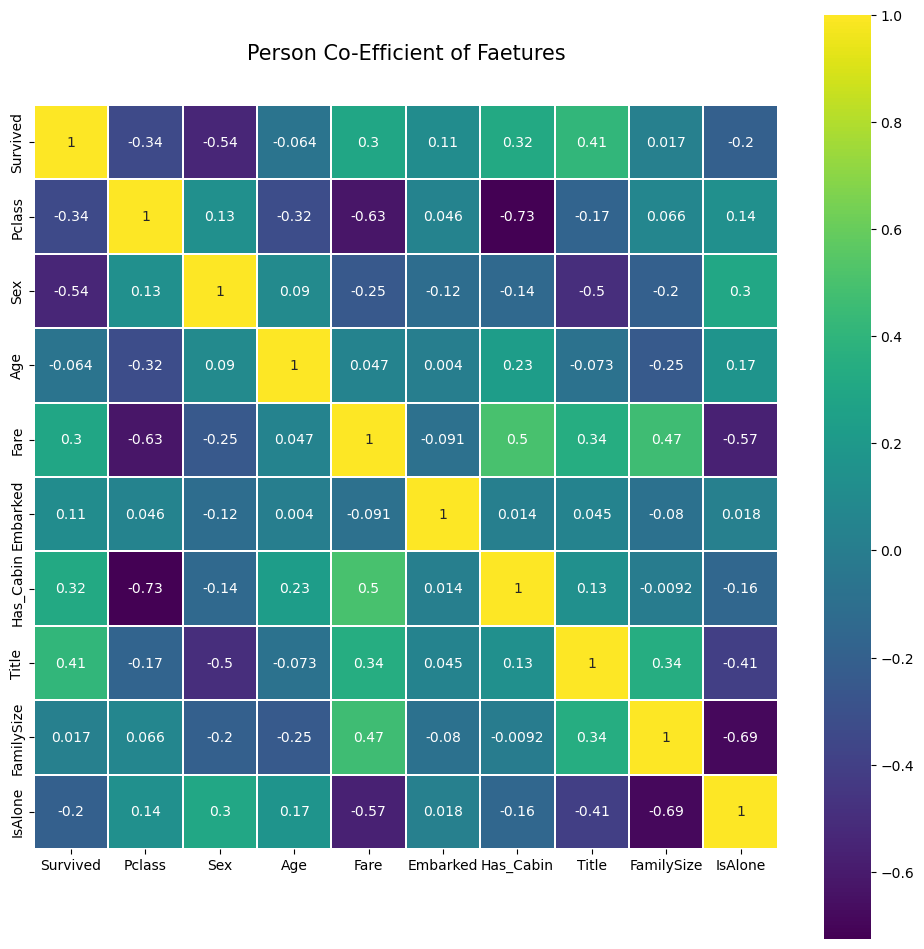

In [151]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Person Co-Efficient of Faetures', y = 1.05, size = 15)
sns.heatmap(train_data.astype(float).corr(), linewidths =0.1,vmax = 1.0, square=True, cmap = colormap, linecolor ='white', annot=True)

Here in the Heatmap we can view a few things;-
1. Sex and Title is having the maximum relationship with Survived.
2. Also we can see Sex and Title gives a absolute relationship of 0.5

So as a starting feature we cannot keep both of them, lets see whats the relationship between each of them

### Title VS Sex

We can already compare features and their relationships with class by grouping them and calculating some basic stats.

Since Survived is a Binary Class (0 or 1), these metrics grouped by Title features:-
1. MEAN;- survival rate
2. COUNT:- Total Observations
3. SUM:- People Survived

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 
sex_mapping = {{'female': 0, 'male': 1}} 

In [152]:
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).agg(['mean', 'count', 'sum'])

Title  Survived           
             mean count  sum
0     1  0.156673   517   81
1     2  0.702703   185  130
2     3  0.793651   126  100
3     4  0.575000    40   23
4     5  0.347826    23    8

In [153]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).agg(['mean', 'count', 'sum'])

Sex  Survived           
           mean count  sum
0   0  0.742038   314  233
1   1  0.188908   577  109

we can see that 'Mr' survival rate is 15% where male survival rate is 18%.
Here we can see that title has more information that the sex, hence here we can see title in that case.  
This maybe because Title may contain information of Sex intrinsively in it.  

We can verify this with the copied data that we kept and see the distribution

In [154]:
# Let's use our 'original_train_data' dataframe to check the sex distribution for each title.
# We use copy() again to prevent modifications in out original_train_data dataset

title_and_sex = org_train_data.copy()[['Name', 'Sex']]


In [155]:
# Create 'Title' feature
title_and_sex['Title'] = title_and_sex['Name'].apply(get_title)

# Map 'Sex' as binary feature
title_and_sex['Sex'] = title_and_sex['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Table with 'Sex' distribution grouped by 'Title'
title_and_sex[['Title', 'Sex']].groupby(['Title'], as_index=False).agg(['mean', 'count', 'sum'])

# Since Sex is a binary feature, this metrics grouped by the Title feature represent:
    # MEAN: percentage of men
    # COUNT: total observations
    # SUM: number of men

Title       Sex           
                    mean count  sum
0        Capt.  1.000000     1    1
1         Col.  1.000000     2    2
2    Countess.  0.000000     1    0
3         Don.  1.000000     1    1
4          Dr.  0.857143     7    6
5    Jonkheer.  1.000000     1    1
6        Lady.  0.000000     1    0
7       Major.  1.000000     2    2
8      Master.  1.000000    40   40
9        Miss.  0.000000   182    0
10       Mlle.  0.000000     2    0
11        Mme.  0.000000     1    0
12         Mr.  1.000000   517  517
13        Mrs.  0.000000   125    0
14         Ms.  0.000000     1    0
15        Rev.  1.000000     6    6
16        Sir.  1.000000     1    1

We find that, excepting for a single observation (a female with 'Dr' title), all the observations for a given Title share the same Sex. Therefore the feature Title is capturing all the information present in Sex. In addition, Title may be more valuable to our task by capturing other characteristics of the individuals like age, social class, personality, ...

It's true that by regrouping rare titles into a single category, we are losing some information regarding Sex. We could create two categories "Rare Male" and "Rare Female", but the separation will be almost meaningless due to the low occurrence of "Rare" Titles (2.6%, 23 out of 891 samples)

Thanks to this in-depth analysis of the Sex and Title features we've seen that, even if the correlation of the feature Sex with the class Survived was higher, Title is a richer feature because it carries the Sex information but also adds other characteristics. Therefore is very likely that Title is going to be the first feature in our final decision tree, making Sex useless after this initial split.

## Gini Impurity:-

Before start working with Decision Trees, let's briefly explain how they work.

The goal of their learning algorithms is always to find the best split for each node of the tree.

But measuring the "goodness" of a given split is a subjective question so, in practice, different metrics are used for evaluating splits. One commonly used metric is Information Gain. The sklearn library we're gonna use implements Gini Impurity, another common measure, so let’s explain it.  

**Gini Impurity**:- 
1. Gini Impurity measures the disorder of a set of elements.
2. It is calculated as the probability of mislabelling an element assuming that the element is randomly labelled according the the distribution of all the classes in the set. 

Decision Trees will try to find the split which decreases Gini Impurity the most across the two resulting nodes. For the titanic example it can be calculated as follows (code should be explicit enough):

In [156]:
# Define function to calculate Gini Impurity

def get_gini_impurity(survival_count,total_count):
    #getting the survival and not_survival probability
    survival_prob = survival_count/total_count
    not_survival_prob = (1-survival_prob)
    
    #Getting random observation
    random_observation_survival_prob = survival_prob
    random_observation_not_survival_prob = (1- random_observation_survival_prob)
    
    #Mislabbeling observations
    mislabelled_surv_prob = not_survival_prob * random_observation_survival_prob
    mislabelled_not_surv_prob = survival_prob * random_observation_not_survival_prob
    
    #Getting GINI IMPURITY
    gini_impurity = mislabelled_surv_prob + mislabelled_not_surv_prob
    
    return gini_impurity

Let's use our Sex and Title features as an example and calculate how much each split will decrease the overall weighted Gini Impurity. 

 First, we need to calculate the Gini Impurity of the starting node including all 891 observations in our train dataset. Since only 342 observations survived, the survival probability is around 38.38% (342/891).

In [157]:
# Gini Impurity of starting node
gini_impurity_starting_node = get_gini_impurity(342, 891)
gini_impurity_starting_node

0.47301295786144265

We're now going to simulate both splits, calculate the impurity of resulting nodes and then obtain the weighted Gini Impurity after the split to measure how much each split has actually reduced impurity.

If we split by Sex, we'll have the two following nodes:
1. Node with men: 577 observations with only 109 survived
2. Node with women: 314 observations with 233 survived



In [158]:
# Gini Impurity decrease of node for 'male' observations
gini_impurity_men = get_gini_impurity(109, 577)
gini_impurity_men

0.3064437162277843

In [159]:
# Gini Impurity decrease if node splited for 'female' observations
gini_impurity_women = get_gini_impurity(233, 314)
gini_impurity_women

0.3828350034484158

In [160]:
# Gini Impurity decrease if node splited by Sex
men_weight = 577/891
women_weight = 314/891
weighted_gini_impurity_sex_split = (gini_impurity_men * men_weight) + (gini_impurity_women * women_weight)

sex_gini_decrease = weighted_gini_impurity_sex_split - gini_impurity_starting_node
sex_gini_decrease

-0.13964795747285214

If we split by Title == 1 (== Mr), we'll have the two following nodes:

1. Node with only Mr: 517 observations with only 81 survived
2. Node with other titles: 374 observations with 261 survived

In [161]:
# Gini Impurity decrease of node for observations with Title == 1 == Mr
gini_impurity_title_1 = get_gini_impurity(81, 517)
gini_impurity_title_1

0.26425329886377663

In [162]:
# Gini Impurity decrease if node splited for observations with Title != 1 != Mr
gini_impurity_title_others = get_gini_impurity(261, 374)
gini_impurity_title_others

0.42170207898424317

In [163]:
# Gini Impurity decrease if node splited for observations with Title == 1 == Mr
title_1_weight = 517/891
title_others_weight = 374/891
weighted_gini_impurity_title_split = (gini_impurity_title_1 * title_1_weight) + (gini_impurity_title_others * title_others_weight)

title_gini_decrease = weighted_gini_impurity_title_split - gini_impurity_starting_node
title_gini_decrease

-0.14267004758907514

We find that the Title feature is slightly better at reducing the Gini Impurity than Sex.   
This confirms our previous analysis, and we're now sure that Title will be used for the first split.   
Sex will therefore be neglected since the information is already included in the Title feature. 

## Getting best tree depth using Cross Validation

This is a critical point in our Decision Tree. We need to make sure, we don't overfit the model.

In the case of decision trees, the 'max_depth' parameter determines the maximum number of attributes the model is going to use for each prediction (up to the number of available features in the dataset). A good way to find the best value for this parameter is just iterating through all the possible depths and measure the accuracy with a robust method such as Cross Validation.

Cross Validation is a model validation technique that splits the training dataset in a given number of "folds". Each split uses different data for training and testing purposes, allowing the model to be trained and tested with different data each time. This allows the algorithm to be trained and tested with all available data across all folds, avoiding any splitting bias and giving a good idea of the generalisation of the chosen model. The main downside is that Cross Validation requires the model to be trained for each fold, so the computational cost can be very high for complex models or huge datasets.

In [164]:
#Performing K-Fold Cross Validation
cv = KFold(n_splits = 10)

accuracies = []
max_attributes = len(list(test_data))
depth_range = range(1,max_attributes+1)

#Testing maximum depth from 1 to max attributes

for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth= depth)   #Getting the Decision Tree Classifier
    
    for train_fold, valid_fold in cv.split(train_data):
        f_train = train_data.loc[train_fold] #Extract train data cv indexes
        f_valid = train_data.loc[valid_fold] #Extract valid data cv indexes
        
        #We will fit the model
        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) # We fit the model with the fold train
        
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])# We calculate accuracy with the fold v
        
        fold_accuracy.append(valid_acc)
        
        #Getting the average fold accuracies
        avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)

# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.782285
         2          0.799189
         3          0.828277
         4          0.811498
         5          0.820437
         6          0.814881
         7          0.814856
         8          0.817091
         9          0.826092


The best max_depth parameter seems therefore to be 3 (82.8% average accuracy across the 10 folds), and feeding the model with more data results in worst results probably due to over-fitting. We'll therefore use 3 as the max_depth parameter for our final model.

## Final Tree:-

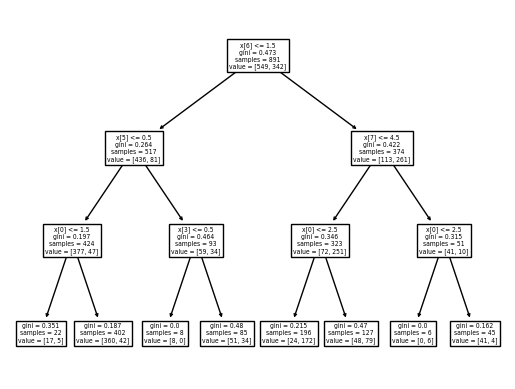

In [166]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_train = train_data['Survived']
x_train = train_data.drop(['Survived'], axis=1).values 
x_test = test_data.values

# Create Decision Tree with max_depth = 3
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
tree.plot_tree(decision_tree.fit(x_train, y_train))

# Predicting results for test dataset
y_pred = decision_tree.predict(x_test)
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": y_pred
    })
submission.to_csv('submit.csv', index=False)



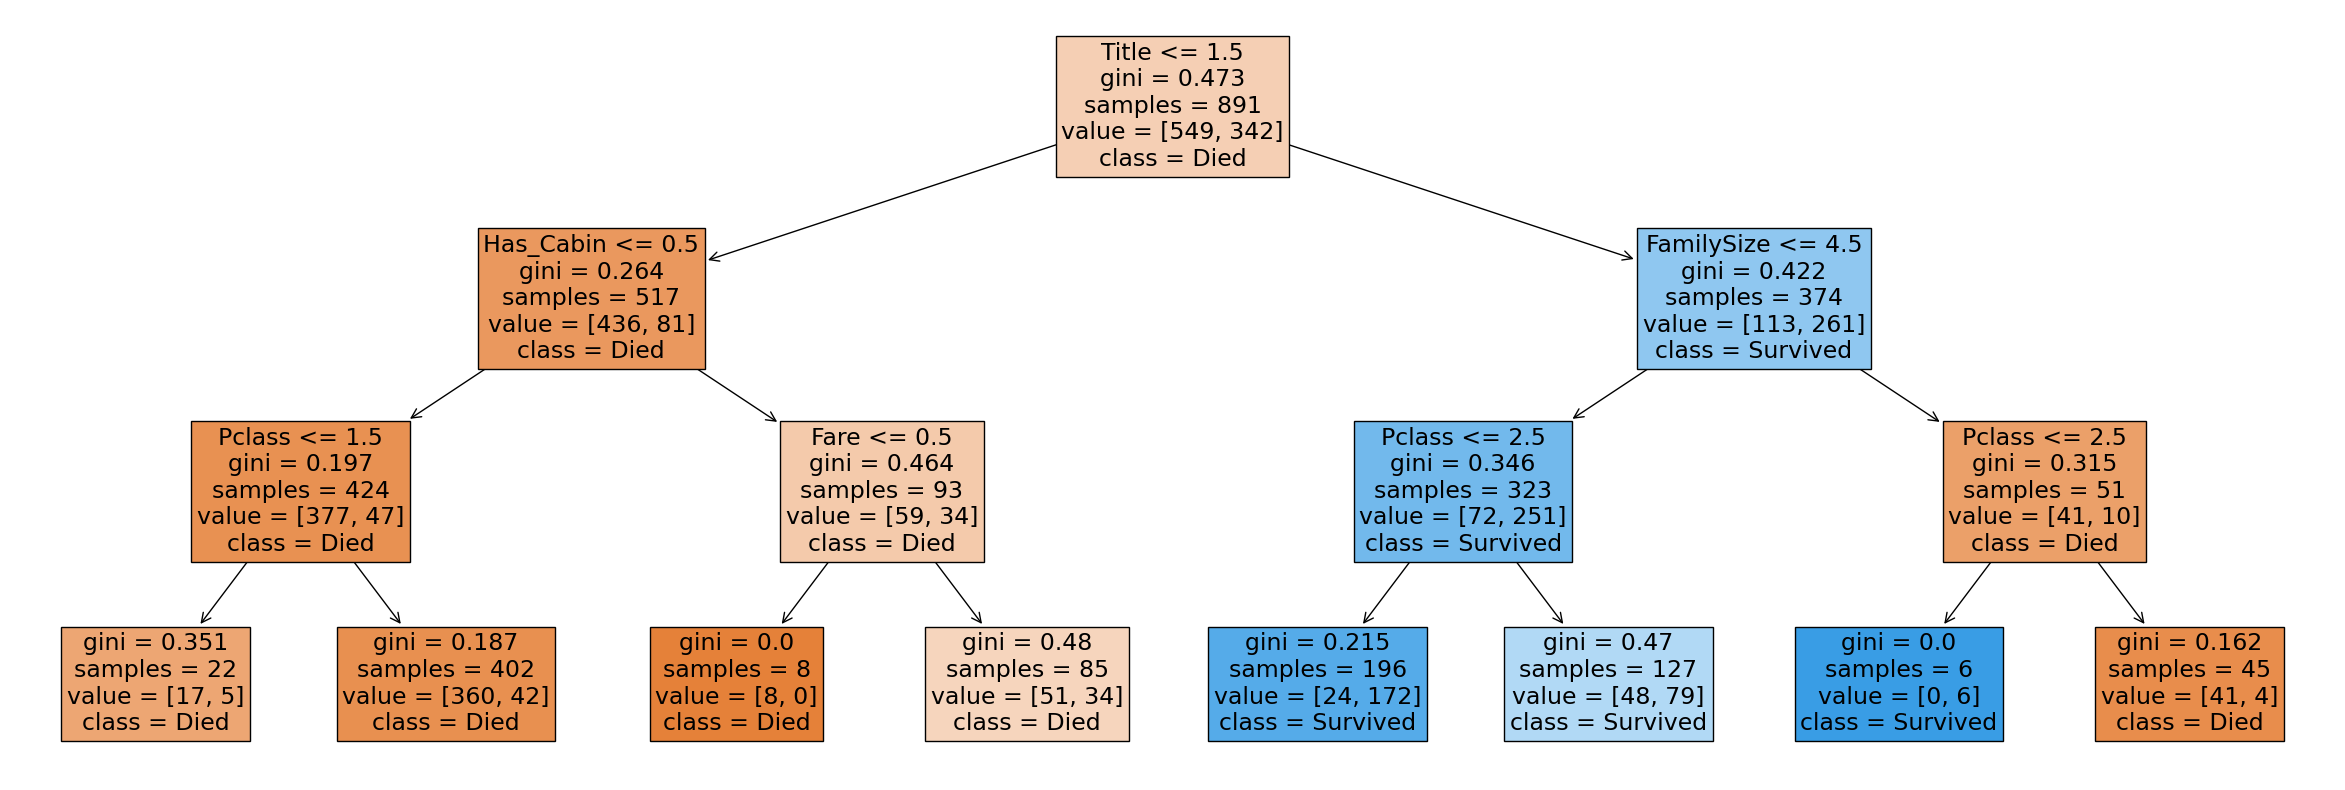

In [170]:
plt.figure(figsize=(30, 10))
tree.plot_tree(
    decision_tree,
    feature_names=list(train_data.drop(['Survived'], axis=1)),
    impurity=True,
    filled=True,
    fontsize=17,
    class_names = ['Died', 'Survived']
)
plt.show()

In [171]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

82.38

## Conclusion:-

Hence we found that our model gives a accuracy of 82.38%, which is not bad at all.

Supriyo